# Import Data and Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [ ]:
df = pd.read_csv('/content/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
#Check Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

All numerical variable is in numerical data type, categorical variable is in string data type, however the FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE is not in datetime data type.

## Data Cleansing

### Converting datetime data type

In [ ]:
#Convert Date columns to datetime dtype
df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME']] = df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME']].apply(pd.to_datetime)

In [ ]:
#LAST_FLIGHT_DATE has some abnormal value : 29th February 2014 although not a leap year

df.loc[df['LAST_FLIGHT_DATE'].str.contains('0:00:00')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,2007-06-17,2007-06-17,Female,6,guangzhou,guangdong,CN,46.0,2014-03-31,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,2009-08-26,2010-04-29,Male,5,haerbin,heilongjiang,CN,70.0,2014-03-31,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,2006-11-10,2007-01-26,Male,5,.,beijing,CN,39.0,2014-03-31,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,2005-07-13,2005-08-06,Male,5,guangzhou,guangdong,CN,40.0,2014-03-31,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,2006-05-24,2007-04-21,Male,5,wuhan,hubei,CN,50.0,2014-03-31,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,2013-01-11,2013-07-10,Male,4,dalianshi,liaoning,CN,23.0,2014-03-31,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,2009-07-26,2009-07-26,Male,4,tianjin,tianjin,CN,37.0,2014-03-31,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,2011-04-11,2011-04-20,Male,4,guangzhou,guangdong,CN,34.0,2014-03-31,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,2007-10-31,2008-03-13,Male,4,foshan,guangdong,CN,42.0,2014-03-31,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [ ]:
#Convert LAST_FLIGHT_DATE to datetime data type and its abnormal value to missing value
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors = 'coerce')

### Addressing missing and duplicated value

In [ ]:
df.isnull().sum()

In [ ]:
#Percentage of missing value in each features
df.isnull().sum()/ len(df)*100

MEMBER_NO            0.000000
FFP_DATE             0.000000
FIRST_FLIGHT_DATE    0.000000
GENDER               0.004763
FFP_TIER             0.000000
WORK_CITY            3.602273
WORK_PROVINCE        5.156538
WORK_COUNTRY         0.041278
AGE                  0.666794
LOAD_TIME            0.000000
FLIGHT_COUNT         0.000000
BP_SUM               0.000000
SUM_YR_1             0.874770
SUM_YR_2             0.219089
SEG_KM_SUM           0.000000
LAST_FLIGHT_DATE     0.668381
LAST_TO_END          0.000000
AVG_INTERVAL         0.000000
MAX_INTERVAL         0.000000
EXCHANGE_COUNT       0.000000
avg_discount         0.000000
Points_Sum           0.000000
Point_NotFlight      0.000000
dtype: float64

All the missing value is below 5% to address them we need to do Exploratory Data Analysis and define our metric first to decide between dropping the missing value or the feature.

In [ ]:
#Check Duplicate
df.duplicated().sum()
#No duplicate

0

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

In [ ]:
#Defining the numerical and categorical columns
df_numerical = ['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
df_category = ['GENDER', 'WORK_CITY', 'WORK_COUNTRY','WORK_PROVINCE']
df_datetime = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

### Categorical Variable

In [ ]:
#Value counts
for col in df_category:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: GENDER
Male      48134
Female    14851
Name: GENDER, dtype: int64


Column: WORK_CITY
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64


Column: WORK_COUNTRY
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: WORK_COUNTRY, Length: 118, dtype: int64


Column: WORK_PROVINCE
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1165, dtype: int64




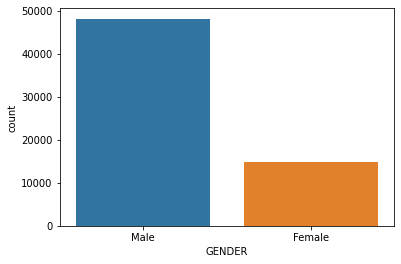

In [ ]:
#Countplot
sns.countplot(x='GENDER', data = df)

In [ ]:
#Category statistical summary
df[df_category].describe()

,GENDER,WORK_CITY,WORK_COUNTRY,WORK_PROVINCE
count,62985,60719,62962,59740
unique,2,3234,118,1165
top,Male,guangzhou,CN,guangdong
freq,48134,9386,57748,17509


In [ ]:
df['WORK_CITY'].unique()
#Several customer is missing from WORK_CITY with dots(.)

array(['.', nan, 'Los Angeles', ..., 'BELLREGUARD', 'Danville',
       'lingshui'], dtype=object)

In [ ]:
df.loc[df['WORK_CITY'] == '.']
#Deciding between to drop the missing value or the feature with relevance in our segmenting metrics

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
20,21501,2008-07-30,2008-11-21,Male,6,.,beijing,CN,49.0,2014-03-31,...,122763.0,167113,2014-03-28,4,6.438095,31,4,1.369404,251134,9
27,47114,2005-01-15,2005-03-17,Male,6,.,beijing,CN,47.0,2014-03-31,...,83139.0,148685,2014-03-21,11,9.493151,51,8,1.433364,235176,14
40,18793,2006-04-25,2006-06-02,Male,6,.,beijing,CN,48.0,2014-03-31,...,85119.0,137876,2014-03-30,2,7.505155,46,11,1.458541,210435,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61806,4388,2011-04-20,2011-12-10,Male,4,.,beijing,CN,40.0,2014-03-31,...,0.0,1586,2013-02-01,425,1.000000,1,0,0.571627,634,0
62035,10787,2012-08-29,2013-10-16,Male,6,.,beijing,CN,55.0,2014-03-31,...,1044.0,1199,2013-10-18,166,2.000000,2,0,0.707698,1133,3
62099,41502,2012-01-01,2012-01-01,Female,4,.,shanghai,CN,44.0,2014-03-31,...,0.0,2085,2012-06-05,666,2.000000,2,0,0.400000,692,0
62546,15528,2012-06-03,2012-06-03,Male,4,.,beijing,CN,44.0,2014-03-31,...,0.0,1629,2013-03-14,384,284.000000,284,0,0.417772,576,0


In [ ]:
df['WORK_PROVINCE'].unique()
#No abnormal value but there's some typo such as TOPKPPI

array(['beijing', 'CA', 'guizhou', ..., 'NOTARIO', 'TOPKPPI', 'JAWATIMUR'],
      dtype=object)

'WORK_CITY', 'WORK_COUNTRY', and 'WORK_PROVINCE' has more than 10 categories with 'WORK_CITY' has several abnormal value. We can drop the feature as we use RFM metrics.

In [ ]:
df = df.drop(['WORK_CITY', 'WORK_COUNTRY','WORK_PROVINCE'], axis =1)

### Datetime Variable

In [ ]:
#Datetime summary
df[df_datetime].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
count,41510,41510,41510,41169
unique,3057,3028,1,365
top,2011-01-13 00:00:00,2013-02-16 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,89,71,41510,832
first,2004-11-01 00:00:00,2004-11-04 00:00:00,2014-03-31 00:00:00,2013-04-01 00:00:00
last,2013-03-31 00:00:00,2014-03-14 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


Some value in 'FIRST_FLIGHT_DATE' before 'FFP_DATE' and after 'LOAD_TIME' date
*   LOAD TIME possibly only contain single date we can drop this for modelling except if the metrics need this information

In [ ]:
df.loc[df['FIRST_FLIGHT_DATE'] < '2004-11-01']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
4455,41193,2011-02-27,1905-12-31,Male,4,35.0,2014-03-31,40,26851,5956.0,22244.0,52763,2014-03-14,18,18.051282,92,1,0.688062,33588,27
30099,1999,2004-11-10,1905-12-31,Female,4,37.0,2014-03-31,8,6366,5385.0,1907.0,9592,2013-11-19,134,75.000000,178,1,0.775909,26192,38


In [ ]:
#Drop 'FIRST_FLIGHT_DATE' before first 'FFP_DATE'
df = df.loc[df['FIRST_FLIGHT_DATE'] > '2004-11-01']

In [ ]:
df.loc[df['FIRST_FLIGHT_DATE'] > '2014-03-31']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
3293,12746,2008-09-24,2015-03-09,Male,5,47.0,2014-03-31,25,41312,18347.0,19595.0,52083,2014-01-08,84,22.083333,192,1,0.807256,42312,2
3733,17746,2007-06-04,2015-02-15,Male,4,41.0,2014-03-31,43,33326,14258.0,22887.0,63459,2014-03-27,5,17.261905,191,2,0.625447,37979,7
16393,56588,2007-04-01,2015-05-30,Male,4,43.0,2014-03-31,17,11376,4956.0,7810.0,17470,2014-02-17,44,32.312500,102,0,0.845973,11376,0
25240,62783,2006-03-08,2014-07-14,Male,4,38.0,2014-03-31,11,9113,576.0,5820.0,18642,2013-09-15,199,38.700000,175,11,0.504935,647113,13


In [ ]:
#Drop abnormal value that has FIRST_FLIGHT_DATE later than LOAD_TIME
df = df.loc[df['FIRST_FLIGHT_DATE'] < '2014-03-31']

In [ ]:
df.dropna(subset= ['LAST_FLIGHT_DATE'], inplace = True)

### Numerical Variable

In [ ]:
#Statistical summary of numerical value
df[df_numerical].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


FFP_TIER show a possibility of being a categorical variable.








In [ ]:
df[['FFP_TIER']].value_counts()
#Confirmed it's a categorical variable

FFP_TIER
4           37017
5            3152
6            1347
dtype: int64

Drop customer with 0 'FLIGHT_COUNT', 'SUM_YR_1', 'SUM_YR_2', and 'SEG_KM_SUM'

In [ ]:
df.loc[(df['FLIGHT_COUNT'] == 0)]
#All data is for customer had already fly with the airline

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [ ]:
df.loc[df['SEG_KM_SUM'] == 0]
#No customer has 0 km in total flight

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [ ]:
df.loc[(df['SUM_YR_1'] == 0) & (df['SUM_YR_2'] ==0)]
#A number of customer has fare income and vote prices = 0

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
4915,41807,2011-09-25,2011-09-25,Male,4,45.0,2014-03-31,34,31971,0.0,0.0,47521,2013-06-19,287,12.848485,54,1,0.724819,31971,1
12761,17520,2011-05-02,2011-05-02,Female,4,57.0,2014-03-31,25,11519,0.0,0.0,33525,2013-09-30,184,18.083333,55,0,0.543600,12019,1
13382,41298,2011-03-30,2011-04-06,Male,4,44.0,2014-03-31,19,15934,0.0,0.0,19731,2013-08-05,240,26.888889,61,3,0.888564,15934,3
17337,13275,2009-10-10,2009-10-10,Female,4,NaN,2014-03-31,17,9542,0.0,0.0,23035,2013-10-19,165,31.937500,108,1,0.610588,9542,3
18166,35602,2007-09-23,2007-09-23,Male,4,38.0,2014-03-31,13,11929,0.0,0.0,17615,2013-11-24,129,40.083333,162,1,0.765385,11929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,16415,2013-01-20,2013-01-20,Female,4,35.0,2014-03-31,2,0,0.0,0.0,3848,2013-01-20,437,0.000000,0,0,0.000000,0,0
62983,18375,2011-05-20,2013-06-05,Female,4,25.0,2014-03-31,2,0,0.0,0.0,1134,2013-06-09,297,4.000000,4,1,0.000000,12318,22
62984,36041,2010-03-08,2013-09-14,Male,4,38.0,2014-03-31,4,0,0.0,0.0,8016,2014-01-03,89,37.000000,60,14,0.000000,106972,43
62985,45690,2006-03-30,2006-12-02,Female,4,43.0,2014-03-31,2,0,0.0,0.0,2594,2014-03-03,29,166.000000,166,0,0.000000,0,0


In [ ]:
#Drop the anomaly of customer with 0 monetization
df = df.loc[(df['SUM_YR_1'] > 0) & (df['SUM_YR_2'] > 0)]

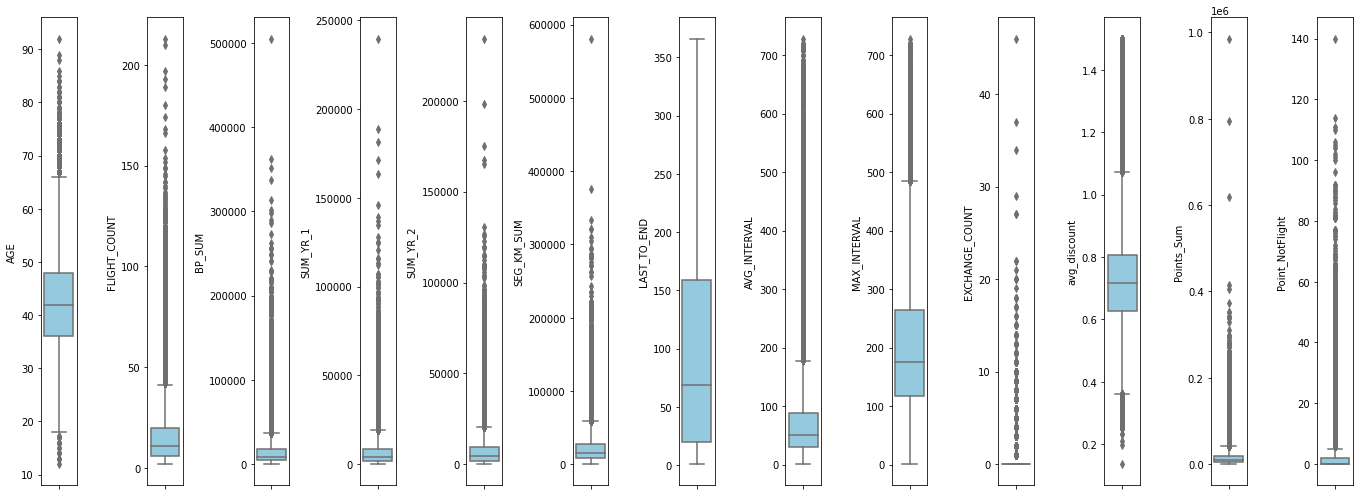

In [ ]:
#Check outliers by boxplot
features = df_numerical
plt.figure(figsize=(20,7))
for i in range(1,len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y = df[features[i]], color = 'skyblue')
  plt.tight_layout()

Outlier in SUM_YR_1, SUM_YR_2, SEG_KM_SUM, and Point_NotFlight is a sensical for customer who use the airline very frequently, so it is safe to keep the outlier except for age.

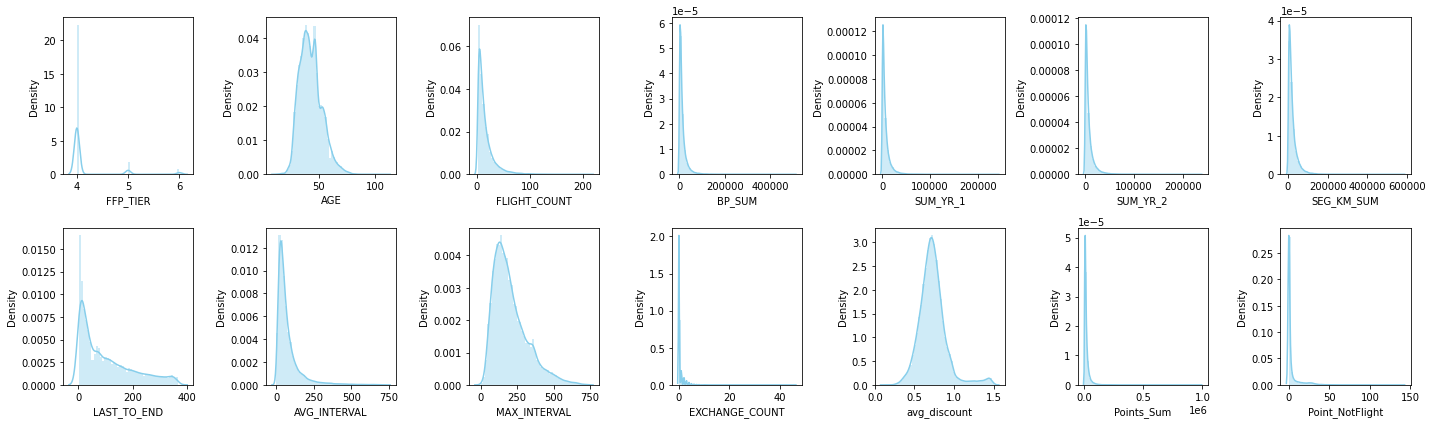

In [ ]:
#Column Distribution using histogram
plt.figure(figsize=(20,6))
for i in range(0, len(features)):
  plt.subplot(2, 7, i+1)
  sns.distplot(x=df[features[i]], color = 'skyblue')
  plt.xlabel(features[i])
  plt.tight_layout()

All the features has skewed distribution except avg_discount that follows normal distribution



Maximum age is abnormal outlier

In [ ]:
#Drop max age
df = df[df['AGE'] != 110]

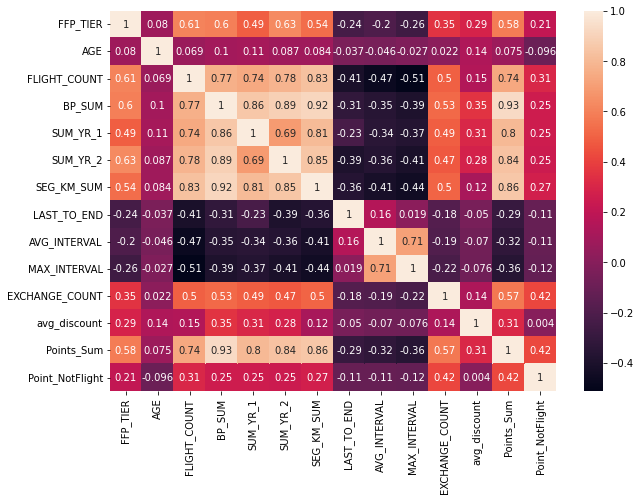

In [ ]:
#Heatmap of numerical values
df_corr = df[df_numerical].corr()
correlation = df_corr
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True)

In [ ]:
df.isnull().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 2
FFP_TIER               0
AGE                  223
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1               0
SUM_YR_2               0
SEG_KM_SUM             0
LAST_FLIGHT_DATE     341
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

# Customer Segmentation

LRFMC is one of the RFM model variation as not all RFM model is suitable for all industries. For example, the direct use of Monetary does not indicate or reflect the true value of the customers.

 L: Length of Customer Relationship (Active Duration) : **LOAD_TIME - FFP_DATE**
 
 R: Recency (Consumption Interval) : **LAST_TO_END** which means **the smaller the recency the better since the distance of the date is smaller to the end of the window of observation**
 
 F: Frequency (Number of Flights) : **FLIGHT_COUNT**
 
 M: Mileage of Flight (Reflect customer Dependency) : **SEG_KM_SUM**
 
 C: Average discount factor (Correspond to the cabin class or customer value) : **avg_discount**

For this aviation industry customer segmentation we use this metric, therefore there is some feature that won't be relevant such as WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, and AGE.

## Feature Selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41168 entries, 0 to 62958
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           41168 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  41168 non-null  datetime64[ns]
 2   GENDER             41166 non-null  object        
 3   FFP_TIER           41168 non-null  int64         
 4   AGE                40945 non-null  float64       
 5   LOAD_TIME          41168 non-null  datetime64[ns]
 6   FLIGHT_COUNT       41168 non-null  int64         
 7   BP_SUM             41168 non-null  int64         
 8   SUM_YR_1           41168 non-null  float64       
 9   SUM_YR_2           41168 non-null  float64       
 10  SEG_KM_SUM         41168 non-null  int64         
 11  LAST_FLIGHT_DATE   41168 non-null  datetime64[ns]
 12  LAST_TO_END        41168 non-null  int64         
 13  AVG_INTERVAL       41168 non-null  float64       
 14  MAX_IN

In [ ]:
#Drop column that we don't use for the metrics
df = df.drop(['FIRST_FLIGHT_DATE', 'GENDER', 'AGE', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'LAST_FLIGHT_DATE', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'Points_Sum', 'Point_NotFlight'], axis =1)

In [ ]:
df.isnull().sum()
#All missing value had been dropped or feature that we didn't select for modelling

FFP_DATE        0
FFP_TIER        0
LOAD_TIME       0
FLIGHT_COUNT    0
SEG_KM_SUM      0
LAST_TO_END     0
avg_discount    0
dtype: int64

In [ ]:
#Length of Customer Relationship
df['ACTIVE_DURATION'] = df['LOAD_TIME'] - df['FFP_DATE']

In [ ]:
df[['ACTIVE_DURATION']].head()
#Not numerical data need to be converted

,ACTIVE_DURATION
0,2706 days
1,2597 days
2,2615 days
3,2047 days
4,1816 days


In [ ]:
#Convert to numeric
df['ACTIVE_DURATION'] = pd.to_numeric(df['ACTIVE_DURATION'])
df['ACTIVE_DURATION']
#Result in nanosecond

0        233798400000000000
1        224380800000000000
2        225936000000000000
3        176860800000000000
4        156902400000000000
                ...        
62876     98236800000000000
62887     80870400000000000
62919     57196800000000000
62932     38102400000000000
62958     34732800000000000
Name: ACTIVE_DURATION, Length: 41168, dtype: int64

In [ ]:
#Get the data back into days
df['ACTIVE_DURATION'] = df['ACTIVE_DURATION']/(10**9*3600*24)

In [ ]:
#Recency
df[['LAST_TO_END']].head()
#The most recent is the one who has lower recency

,LAST_TO_END
0,1
1,7
2,11
3,97
4,5


In [ ]:
#Frequency
df[['FLIGHT_COUNT']].head()

,FLIGHT_COUNT
0,210
1,140
2,135
3,23
4,152


In [ ]:
#Mileage
df[['SEG_KM_SUM']].head()

,SEG_KM_SUM
0,580717
1,293678
2,283712
3,281336
4,309928


In [ ]:
#Customer Value
df[['avg_discount']].head()
#The higher the discount meaning loyal member

,avg_discount
0,0.961639
1,1.252314
2,1.254676
3,1.090870
4,0.970658


## CREATE LRFMC TABLE

In [ ]:
lrfmcTable = df[['ACTIVE_DURATION', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
lrfmcTable.rename(columns = {'ACTIVE_DURATION' : 'Length', 'LAST_TO_END' : 'Recency', 'FLIGHT_COUNT' : 'Frequency', 'SEG_KM_SUM' : 'Mileage', 'avg_discount' : 'cust_value'}, inplace = True)

In [ ]:
lrfmcTable.sample(10)

,Length,Recency,Frequency,Mileage,cust_value
28421,993.0,24,17,16786,0.479856
9060,1011.0,101,4,40376,0.582500
22025,680.0,265,4,7448,1.482527
50367,548.0,223,5,5236,0.515371
13212,2706.0,27,20,28997,0.610781
3669,2166.0,12,46,52890,0.756258
13819,2848.0,171,12,23710,0.720479
15547,981.0,46,23,34737,0.445018
270,1034.0,1,61,83245,1.337277
26742,1716.0,131,8,12066,0.725323


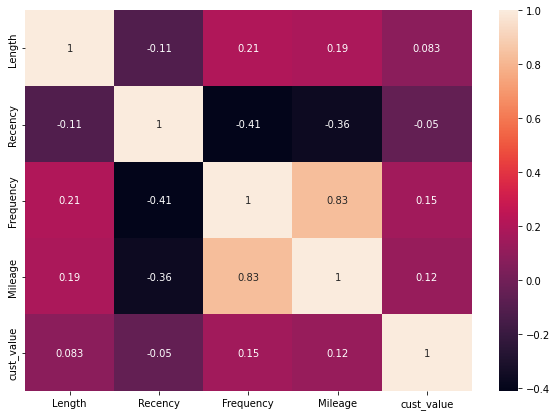

In [ ]:
correlation = lrfmcTable.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True)

## Standardization

In [ ]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(lrfmcTable.astype(float))

# Modelling

### Inertia

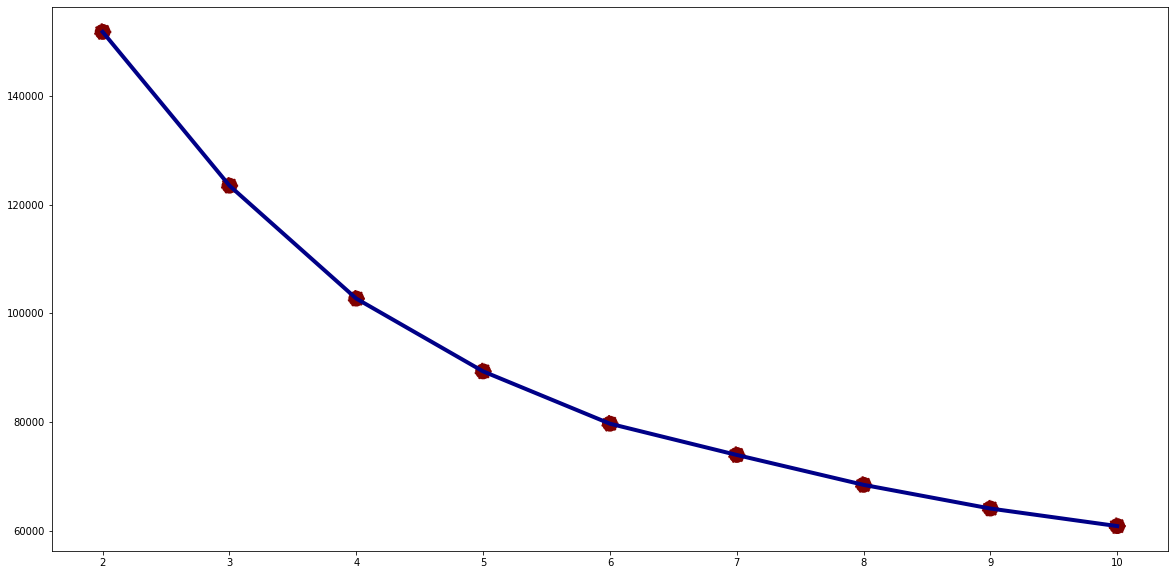

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

## K-means Clustering

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_std)

In [ ]:
df_data_std = pd.DataFrame(data=data_std, columns=list(lrfmcTable))

In [ ]:
df_data_std['clusters'] = kmeans.labels_
lrfmcTable['clusters'] = kmeans.labels_

In [ ]:
lrfmcTable

,Length,Recency,Frequency,Mileage,cust_value,clusters
0,2706.0,1,210,580717,0.961639,2
1,2597.0,7,140,293678,1.252314,2
2,2615.0,11,135,283712,1.254676,2
3,2047.0,97,23,281336,1.090870,2
4,1816.0,5,152,309928,0.970658,2
...,...,...,...,...,...,...
62876,1137.0,194,2,1494,0.295000,3
62887,936.0,232,2,928,0.462931,3
62919,662.0,322,2,1158,0.325000,3
62932,441.0,117,2,368,0.945000,0


In [ ]:
lrfmcTable.groupby('clusters').agg(['max','min'])

Length         Recency      Frequency     Mileage        cust_value  \
             max     min     max  min       max min     max    min        max   
clusters                                                                        
0         1993.0   365.0     204    1        56   2   93191    368   1.477202   
1         3437.0  1164.0     314    1        47   2   90438   1104   1.495062   
2         3437.0   368.0     319    1       213   8  580717  19570   1.486519   
3         3418.0   365.0     366  126        44   2  100472    552   1.500000   

                    
               min  
clusters            
0         0.231798  
1         0.136017  
2         0.381285  
3         0.250000

Based on min-max we can see that:
1. cluster 0 has average to low length, high recency, average frequency, low mileage, and average cust_value.
2. cluster 1 old customer, with average recency, average frequency, average mileage, low cust_value
3. cluster 2 length is diverse there's new and old customer, average recency, highest frequency and cust_value
4. cluster 3 also has diverse length, but with lowest frequency and recency, average mileage, average cust_value

In [ ]:
lrfmcTable.groupby('clusters').aggregate(['mean','median'])

Length             Recency         Frequency         \
                 mean  median        mean median       mean median   
clusters                                                             
0          934.982373   878.0   56.723821   45.0  12.844006   11.0   
1         2505.920679  2475.0   71.091313   57.5  14.360810   13.0   
2         1942.501077  1959.0   22.209959   11.0  51.179315   46.0   
3         1250.711085  1073.0  250.426904  246.0   6.559739    5.0   

               Mileage          cust_value            
                  mean   median       mean    median  
clusters                                              
0         18215.588598  15417.0   0.706754  0.700832  
1         20294.787973  17810.5   0.749879  0.724705  
2         74136.141489  64571.0   0.802870  0.756076  
3          9735.684581   7546.5   0.714274  0.708365

while the mean and median show same info for clustering, however there are some differences in the valie, but overall we can say:

1. cluster 0 has lowest Length, average to high recency, average frequency, average to low mileage, and low cust_value
2. cluster 1 has highest length, average recency, average to low frequency, and average mileage and cust_value
3. cluster 2 has high length, high recency, high frequency, highest mileage, with high cust_value
4. cluster 3 has average to low lemgth, lowest recench, lowest frequency, lowest mileage, and low cust_value

In [ ]:
lrfmcTable['clusters'].value_counts()

0    16225
1    11258
3     9508
2     4177
Name: clusters, dtype: int64

In [ ]:
df_data_std.head()

,Length,Recency,Frequency,Mileage,cust_value,clusters
0,1.359542,-1.028779,12.353132,23.630462,1.320447,2
1,1.232479,-0.967596,7.902767,11.479527,2.977687,2
2,1.253462,-0.926807,7.584884,11.057646,2.991148,2
3,0.591338,-0.049843,0.464300,10.957066,2.057234,2
4,0.322059,-0.987990,8.665687,12.167422,1.371866,2


### Visualization by Radar

In [ ]:
def plot_cluster_radar(data, cluster_label, features=None, center=np.median, ax=None, figsize=(8,8), legend_loc=(1.3,0.9), labels=None): 
    if data.__class__.__name__ == 'DataFrame':
        hasClusterInDF = cluster_label.__class__.__name__ == 'str'
        noFeaturesGiven = features.__class__.__name__ == 'NoneType'
        
        if noFeaturesGiven:
            features = data.columns.drop(cluster_label).tolist() if hasClusterInDF else data.columns.tolist()
                
        if hasClusterInDF:
            cluster_label = data[cluster_label]
            
        data = data[features].values
    
    if ax.__class__.__name__ == 'NoneType':
        fig, ax = plt.subplots(1, figsize=figsize, subplot_kw={'projection': 'polar'})
        
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False) # Set the angle
    angles = np.concatenate((angles,[angles[0]]))
    ax.grid(True)
    ax.set_thetagrids(angles * 180/np.pi, features)
    
    for i, group in enumerate(np.unique(cluster_label)):
        indices = np.where(cluster_label==group)
        
        if labels.__class__.__name__ != 'NoneType':
            group = labels[i]
        
        stats = center(data[indices], axis=0)
        stats = np.concatenate((stats, [stats[0]]))
        ax.plot(angles, stats, linewidth=1, linestyle='solid', label='{}: {}'.format(group, indices[0].shape[0]))
        ax.fill(angles, stats, alpha=0.1)

    n_clusters = np.unique(cluster_label)
    ax.set_title('{} clusters'.format(n_clusters[n_clusters!=-1].shape[0]))
    ax.legend(loc='upper right', bbox_to_anchor=legend_loc)

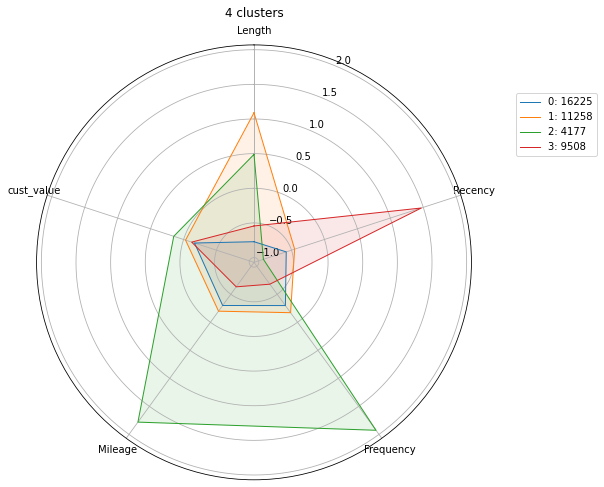

In [ ]:
plot_cluster_radar(df_data_std, 'clusters')
#As mostly the data is skewed we use median

As we mentioned before, the value for the features are lineary positive, except for recency. We have conclude each cluster based on min,max and median,mean. Based on Radar with standardized data:

From this radar chart we can see best customer target is cluster 2. The second best would be the cluster 1. While 0 and 3 is relatively new customers.

1. Group 0 is new customer that we can offer more discount.
WHY? 
*  Because they have closer date to end of  observation (better recency)
*  Has pretty big mileage and frequency compare to their length of relationship with our aviation.
*  The amount of people in this cluster is big

2. Group 1 is the oldest customer that has a tendency to churn. Give a different kind of marketing promotion and feedback such as suggestion or satisfaction Q&A is good for this segmentation.
WHY?
*   High mileage and frequency but less recency in activity than Group 0
*   However, their value and Length is bigger
*   Smaller number of people

2. Group 2 is most loyal and highest value customer. Keep this customer. DM response with feedback also a great way to tailor what's keeping them and implement it to other cluster.
WHY?
*   Highest mileage, frequency, and recency
*   High value customer
*   Second best in Length, but sadly has smallest amount of customer in the cluster

4. Group 3 probably seasonal passenger. Do not focus on this cluster for marketing since it has low value.
WHY?
*   The number is by more or less only half of new customer in cluster 0
*   They have bigger recency means distance from last date to end is bigger
*   Lowest mileage and frequency

